In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
import torch

In [4]:
from test import load_attr, show_latent, load_model
attr_dir = 'Data/celeba'
tmp = load_attr(attr_dir)

version = 14
model_dir = f'logs/CelebA/BTVAE/version_{version}'
model = load_model(model_dir)

attribute file loaded
model loaded


In [5]:
tmp.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [6]:
sampled = tmp.sample(200, random_state=152)
file_name = list(sampled.index)


In [7]:
from test import show_latent
show_latent(file_name, model)

torch.Size([200, 3, 64, 64])


tensor([[-4.7759e-02,  9.7623e-03,  1.2652e-04,  ..., -1.1786e+00,
          2.0907e+00,  3.4541e-03],
        [ 7.5529e-02,  3.6725e-02,  1.8368e-02,  ..., -1.3745e+00,
         -4.4470e-01, -4.6732e-02],
        [-1.1171e-01,  5.7697e-02,  4.3678e-02,  ...,  2.5436e-01,
         -2.7689e-01, -6.7581e-02],
        ...,
        [-7.5397e-02, -5.9840e-02, -9.5984e-02,  ..., -1.3209e+00,
         -1.9840e+00, -4.9571e-02],
        [ 4.4858e-02,  4.0696e-02, -9.6990e-02,  ..., -7.6846e-01,
         -1.9224e+00,  2.8615e-02],
        [-4.5914e-02,  2.7876e-02, -1.3768e-02,  ..., -3.5493e-01,
          7.5777e-01, -5.3125e-02]], grad_fn=<AddmmBackward0>)

In [8]:
a = show_latent(file_name, model)

torch.Size([200, 3, 64, 64])


In [9]:
a[0]

tensor([-5.4685e-02, -5.6783e-04, -2.9422e-02,  1.1712e-01,  1.8518e-02,
         9.4667e-02, -4.8706e-02,  3.7957e-01,  2.0384e-02, -4.7287e-02,
         4.3523e-02,  5.0981e-02,  1.2728e-01,  6.3310e-02,  4.1174e-02,
         2.9152e-01,  2.8400e-02,  8.5210e-02,  1.9699e-02, -9.8709e-03,
        -8.3608e-03, -6.3824e-02,  7.8670e-02,  5.6459e-03,  8.5400e-02,
         6.3449e-02,  2.2296e-02, -2.9308e-02,  5.0109e-02,  7.1238e-02,
         5.9761e-02, -1.7235e-01, -2.4277e-03,  3.5669e-02,  1.1095e-03,
         1.1376e-03,  1.3460e-02,  2.1560e-02, -2.3405e-02, -1.2147e+00,
         1.5804e-01,  8.4683e-02,  5.8698e-02,  1.9727e-02,  6.4558e-02,
        -3.5529e-03, -3.0646e-02,  7.5313e-02,  3.8699e-02, -2.3045e-02,
         1.1407e-01, -9.7724e-02,  4.4596e-02, -5.2539e-02,  9.7473e-02,
        -8.4518e-02,  3.4672e-02,  2.0022e-02,  8.6364e-02,  8.6640e-02,
        -2.5092e-02,  1.8470e+00,  2.3898e-02, -1.3319e-01,  1.0766e-01,
        -2.2671e-02, -3.4621e-02,  2.8421e-02,  7.1

In [10]:
a_numpy = a.detach().cpu().numpy()

In [11]:
a_numpy.shape

(200, 128)

In [17]:
import pandas as pd
pd.DataFrame(a_numpy).describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-0.002147,0.021439,-0.002860,0.000097,-0.002443,0.001354,-0.028870,-0.106005,-0.000009,-0.002556,...,0.123539,-0.007822,-0.000314,0.005534,0.134331,-0.034278,0.005845,0.032762,-0.113230,-0.017446
std,0.059965,0.060776,0.062855,0.056528,0.061745,0.062281,0.060284,1.025722,0.059414,0.064725,...,0.843847,0.060771,0.057309,0.061499,1.090931,0.053823,0.060450,0.944685,0.996734,0.062774
min,-0.194811,-0.172448,-0.202728,-0.207627,-0.166331,-0.165984,-0.191668,-2.422902,-0.190418,-0.198699,...,-1.951061,-0.158715,-0.170825,-0.204605,-2.655209,-0.196284,-0.182608,-2.818507,-2.609613,-0.152770
25%,-0.042814,-0.016475,-0.042616,-0.033395,-0.042307,-0.036236,-0.068027,-0.772111,-0.038125,-0.042317,...,-0.451157,-0.045705,-0.037458,-0.030097,-0.584208,-0.069153,-0.035548,-0.595762,-0.758656,-0.062623
50%,-0.008329,0.019571,0.000239,-0.000580,-0.001944,-0.000801,-0.031053,-0.205632,0.000843,-0.004540,...,0.093745,-0.002476,0.000962,0.003603,0.114103,-0.030867,0.009645,0.025727,-0.070014,-0.019532
75%,0.038109,0.058614,0.033847,0.034906,0.034846,0.044748,0.009291,0.503687,0.030832,0.035337,...,0.672906,0.033013,0.041996,0.049734,0.778008,-0.002259,0.046615,0.654622,0.509800,0.019516
max,0.168563,0.220225,0.173841,0.136426,0.188460,0.173267,0.187201,3.152943,0.172869,0.184558,...,3.496587,0.145896,0.167155,0.138562,3.466504,0.115722,0.170695,2.877629,2.966920,0.169585


In [12]:
a_standardized = (a_numpy - np.mean(a_numpy, axis=0)) / np.std(a_numpy, axis=0)
sampled_labels = sampled.to_numpy()
sampled_labels_std = (sampled_labels - np.mean(sampled_labels, axis=0)) / np.std(sampled_labels, axis=0)

In [13]:
a_standardized

array([[-0.8783432 , -0.36301428, -0.42364496, ..., -1.6124104 ,
         2.62764   ,  0.20657055],
       [ 1.4555578 ,  0.02829104, -0.18315084, ..., -0.9332195 ,
        -0.5778678 , -0.23443113],
       [ 0.92661667,  0.31839862, -0.05108759, ...,  0.50661933,
        -0.24488153,  0.8714819 ],
       ...,
       [-1.2245992 , -1.3407139 , -1.4852934 , ..., -1.43655   ,
        -1.8816574 , -0.5130517 ],
       [ 0.7858479 ,  0.31764075, -1.5013359 , ..., -0.8502611 ,
        -1.8196818 ,  0.73558587],
       [-0.51103425, -0.16385022,  0.01870809, ..., -0.38836557,
         0.8596025 , -0.2701515 ]], dtype=float32)

7.4505807e-10

## A correlation

In [100]:
a_self_corr = a_standardized.T @ a_standardized / 200
a_self_corr

array([[ 0.9999998 , -0.00208968, -0.15243082, ...,  0.03890373,
        -0.2004022 , -0.02822154],
       [-0.00208968,  1.0000004 , -0.0209948 , ...,  0.11249083,
        -0.00919768,  0.12057672],
       [-0.15243082, -0.0209948 ,  1.0000001 , ..., -0.02832371,
         0.13267334, -0.07199557],
       ...,
       [ 0.03890373,  0.11249083, -0.02832371, ...,  1.0000004 ,
         0.02836598, -0.00708987],
       [-0.2004022 , -0.00919768,  0.13267334, ...,  0.02836598,
         1.0000001 , -0.17017786],
       [-0.02822154,  0.12057672, -0.07199557, ..., -0.00708987,
        -0.17017786,  1.0000004 ]], dtype=float32)

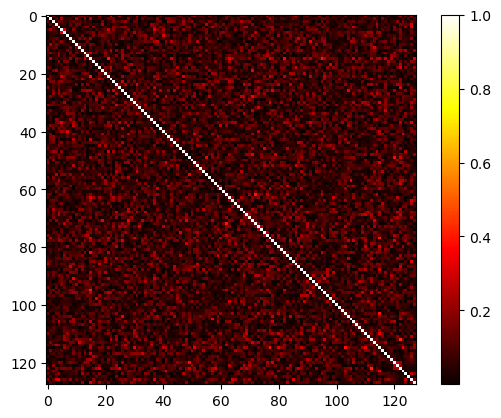

In [101]:
plt.imshow(np.abs(a_self_corr), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

## Sampled Images

tensor([ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.])


In [93]:
random_encoded = torch.normal(0, 0.3, (128,))

In [97]:
random_encoded = torch.zeros(128)
random_encoded[2] = -1
random_encoded[54] = -1
random_encoded[3] = -1
random_encoded[45] = -1
random_encoded[120] = -1
print(random_encoded)

tensor([ 0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.])


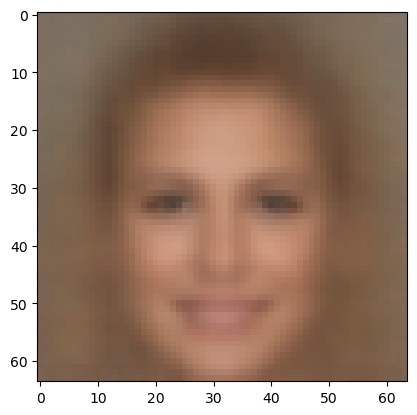

In [98]:

with torch.no_grad():
    result = model.decode(random_encoded)
    plt.imshow(  result[0].permute(1, 2, 0)  )

## Correlation with the existing code

In [19]:
corr = a_standardized.T @ sampled_labels_std
corr

array([[ 33.02025878, -21.32122035, -24.63514095, ..., -25.71867131,
         10.52992349, -18.73395349],
       [  4.63344579,   2.29441024, -20.56765944, ...,  -4.33680743,
          1.44163009,  20.68806089],
       [-27.67962109,  28.12374509, -17.06916842, ...,  17.98537824,
        -12.45006198, -28.76879447],
       ...,
       [ 47.62599398,  -4.41895099,   0.37941887, ..., -26.70608589,
         15.65873663,  11.19223634],
       [  0.89341417,  15.88484911, -29.63809715, ...,   3.21234446,
         -7.8221613 ,   0.96136286],
       [ 33.51236656,  17.61937731,  -1.97906827, ...,   5.32769497,
          5.92926263,  -9.60471962]])

In [20]:
np.mean(np.abs(corr))

13.584641580016898

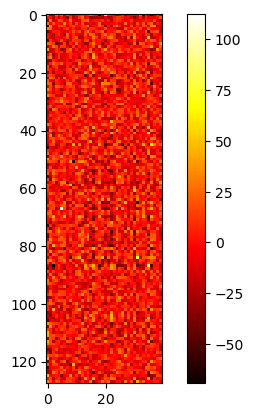

In [21]:
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
np.argwhere(corr > 65)

array([[67,  5],
       [87, 35]])

In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

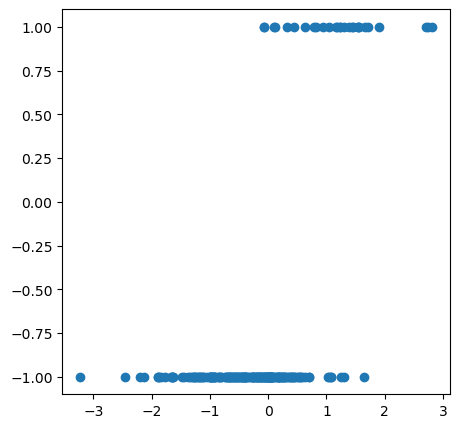

In [ ]:
def visualize_latent(latent: list, attr: pd.DataFrame):
    '''
    given a list of latent vectors and the attribute file, 
    visualize the latent vectors with respect to attributes

    Parameters
        latent: list of latent vectors
        attr: attribute file

    Returns
        None
    '''
    # generate dummy data
    latent = a.detach().cpu().numpy()
     
    # visualize the latent vectors with respect to attributes
    # draw scatter plots
    plt.figure(figsize=(5, 5))
    plt.scatter(latent[:, 67], sampled_labels[:, 5])
    plt.show()

    pass

visualize_latent([], sampled)


In [ ]:
# get unique values of each attribute
unique_values = {}
for col in sampled.columns:
    unique_values[col] = sampled[col].unique()
unique_values

{'5_o_Clock_Shadow': array([-1,  1]),
 'Arched_Eyebrows': array([-1,  1]),
 'Attractive': array([ 1, -1]),
 'Bags_Under_Eyes': array([-1,  1]),
 'Bald': array([-1,  1]),
 'Bangs': array([ 1, -1]),
 'Big_Lips': array([-1,  1]),
 'Big_Nose': array([-1,  1]),
 'Black_Hair': array([ 1, -1]),
 'Blond_Hair': array([-1,  1]),
 'Blurry': array([-1,  1]),
 'Brown_Hair': array([-1,  1]),
 'Bushy_Eyebrows': array([-1,  1]),
 'Chubby': array([-1,  1]),
 'Double_Chin': array([-1,  1]),
 'Eyeglasses': array([-1,  1]),
 'Goatee': array([-1,  1]),
 'Gray_Hair': array([-1,  1]),
 'Heavy_Makeup': array([ 1, -1]),
 'High_Cheekbones': array([-1,  1]),
 'Male': array([-1,  1]),
 'Mouth_Slightly_Open': array([-1,  1]),
 'Mustache': array([-1,  1]),
 'Narrow_Eyes': array([-1,  1]),
 'No_Beard': array([ 1, -1]),
 'Oval_Face': array([ 1, -1]),
 'Pale_Skin': array([ 1, -1]),
 'Pointy_Nose': array([-1,  1]),
 'Receding_Hairline': array([-1,  1]),
 'Rosy_Cheeks': array([-1,  1]),
 'Sideburns': array([-1,  1]),
 '